# Import Libraries and Datas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('hotel_bookings.csv')

In [3]:
train.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

# Data Analysis

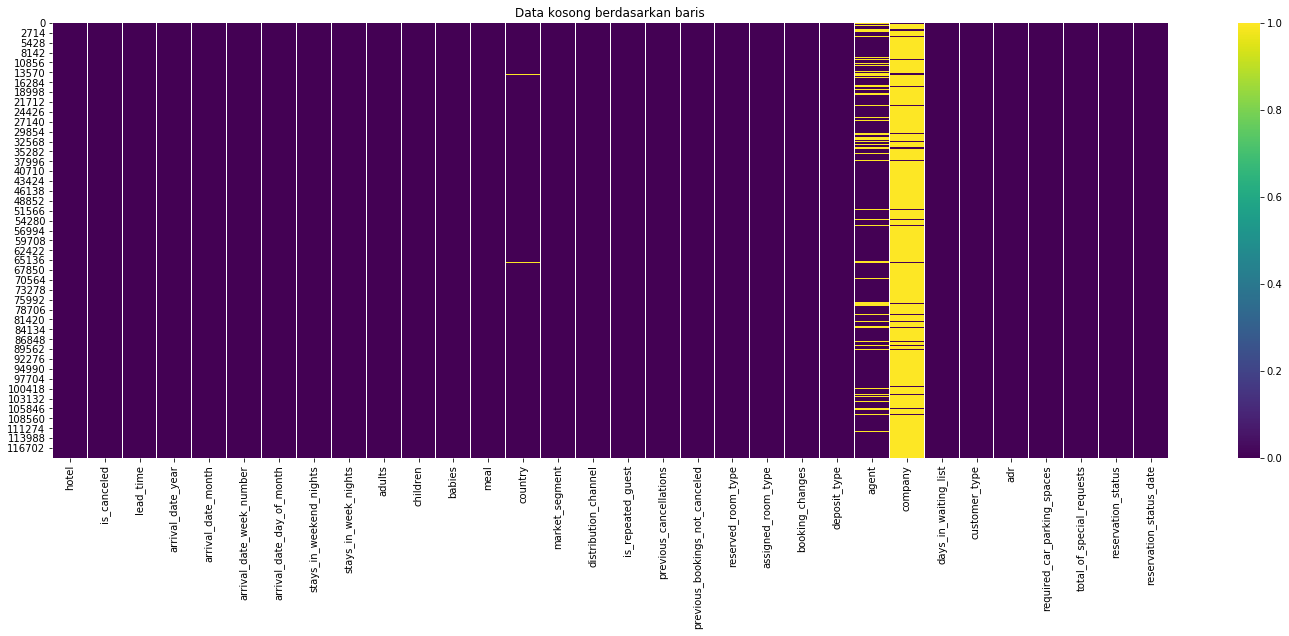

In [4]:
plt.figure(figsize=(25,8))
plt.title('Data kosong berdasarkan baris')
sns.heatmap(data=train.isnull(),cmap='viridis')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 1. Banyak reservasi hotel

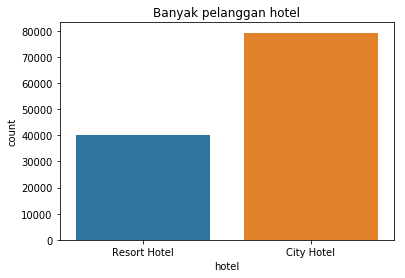

In [6]:
plt.title('Banyak pelanggan hotel')
sns.countplot(x='hotel',data=train)

In [7]:
print('Banyak reservasi hotel:')
train['hotel'].value_counts()

Banyak reservasi hotel:


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

### Perbandingan tamu cancel/tidak berdasarkan hotel

In [3]:
data_analisis = train.copy()

In [4]:
def impute_canceled(cols):
    is_canceled = cols[0]
    hotel = cols[1]
    
    if is_canceled==0:
        return 'Tamu Hotel'
    else:
        return 'Reservasi Batal'
data_analisis['Reservasi']=data_analisis[['is_canceled','hotel']].apply(impute_canceled,axis=1)

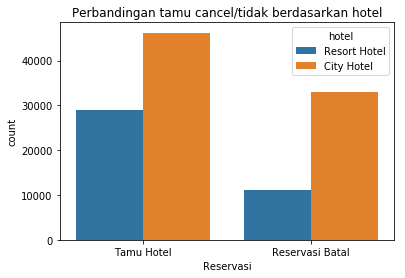

In [11]:
plt.title('Perbandingan tamu cancel/tidak berdasarkan hotel')
sns.countplot(x='Reservasi', hue='hotel', data=data_analisis)

In [14]:
print('Banyak tamu hotel')
data_analisis[data_analisis['is_canceled']==0]['hotel'].value_counts()

Banyak tamu hotel


City Hotel      46228
Resort Hotel    28938
Name: hotel, dtype: int64

In [15]:
print('Banyak pembatalan reservasi')
data_analisis[data_analisis['is_canceled']==1]['hotel'].value_counts()

Banyak pembatalan reservasi


City Hotel      33102
Resort Hotel    11122
Name: hotel, dtype: int64

In [294]:
print('Sebanyak {:.2f}% reservasi untuk City Hotel dibatalkan, lebih tinggi daripada Resort Hotel ({:.2f}%)'.format(
    (data_analisis[(data_analisis['hotel']=='City Hotel') & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['hotel']=='City Hotel']['is_canceled'].count()), 
    (data_analisis[(data_analisis['hotel']=='Resort Hotel') & (data_analisis['is_canceled']==1)]['is_canceled'].count())*100/data_analisis[data_analisis['hotel']=='Resort Hotel']['is_canceled'].count()))

Sebanyak 41.73% reservasi untuk City Hotel dibatalkan, lebih tinggi daripada Resort Hotel (27.76%)


In [5]:
data_analisis = pd.get_dummies(data_analisis, columns=['hotel'])

## 2. Lead Time

### Sebaran lead time berdasarkan pembatalan

(0, 100)

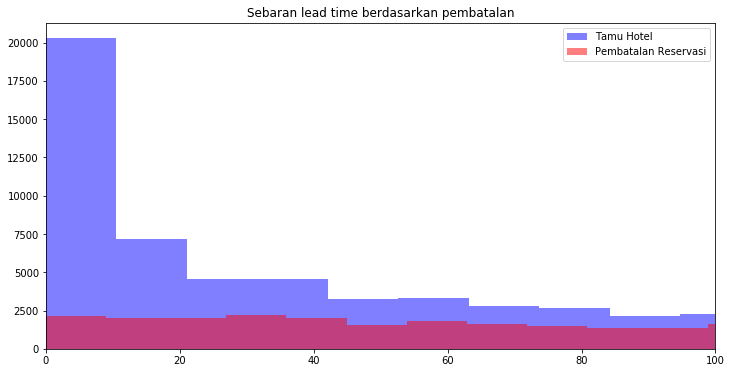

In [22]:
plt.figure(figsize=(12,6))
plt.title('Sebaran lead time berdasarkan pembatalan')
data_analisis[(data_analisis['is_canceled']==0)]['lead_time'].hist(alpha=0.5,bins=70,color='blue',grid=False)
data_analisis[(data_analisis['is_canceled']==1)]['lead_time'].hist(alpha=0.5,bins=70,color='red',grid=False)
plt.legend(loc='upper right',labels=['Tamu Hotel','Pembatalan Reservasi'])
plt.xlim(0,100)

### Sebaran lead time yang melakukan pembatalan reservasi berdasarkan hotel

(0, 100)

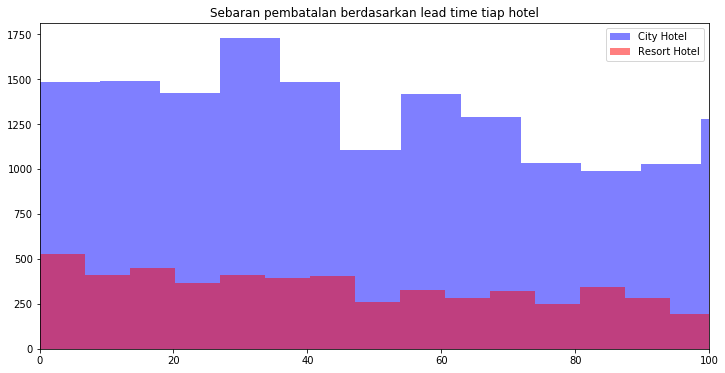

In [10]:
plt.figure(figsize=(12,6))
plt.title('Sebaran pembatalan berdasarkan lead time tiap hotel')
data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['hotel']=='City Hotel')]['lead_time'].hist(alpha=0.5,bins=70,color='blue',grid=False)
data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['hotel']=='Resort Hotel')]['lead_time'].hist(alpha=0.5,bins=70,color='red',grid=False)
plt.legend(loc='upper right',labels=['City Hotel','Resort Hotel'])
plt.xlim(0,100)

Tidak ada pengaruh spesifik pada lead_time jika melihat pengaruhnya berdasarkan hotel.

## 4. Arrival date year

In [6]:
data_analisis = pd.get_dummies(data_analisis, columns=['arrival_date_year'])

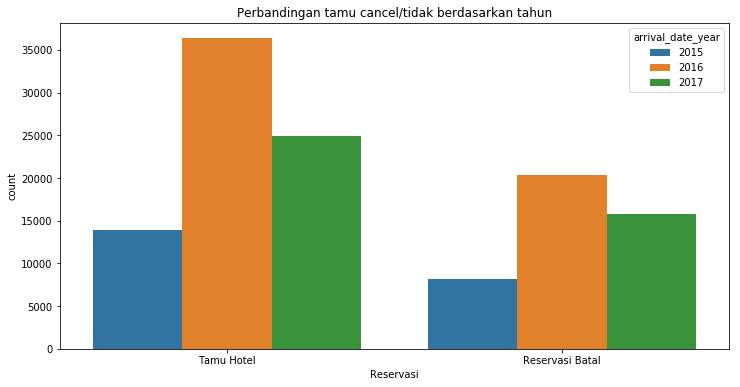

In [11]:
plt.figure(figsize=(12,6))
plt.title('Perbandingan tamu cancel/tidak berdasarkan tahun')
sns.countplot(x='Reservasi', hue='arrival_date_year', data=data_analisis)

In [12]:
print('Banyak reservasi hotel berdasarkan tahun')
data_analisis['arrival_date_year'].value_counts()

Banyak reservasi hotel berdasarkan tahun


2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [13]:
print('Banyak tamu hotel berdasarkan tahun')
data_analisis[data_analisis['is_canceled']==0]['arrival_date_year'].value_counts()

Banyak tamu hotel berdasarkan tahun


2016    36370
2017    24942
2015    13854
Name: arrival_date_year, dtype: int64

In [14]:
print('Banyak pembatalan reservasi berdasarkan tahun')
data_analisis[data_analisis['is_canceled']==1]['arrival_date_year'].value_counts()

Banyak pembatalan reservasi berdasarkan tahun


2016    20337
2017    15745
2015     8142
Name: arrival_date_year, dtype: int64

In [15]:
print('Sebanyak {:.2f}% reservasi tahun 2015 dibatalkan, {:.2f}% pada tahun 2016, dan {:.2f}% pada tahun 2017. Karena perbedaan tidak cukup signifikan, tahun tidak mempengaruhi pembatalan reservasi'.format(
    (data_analisis[(data_analisis['arrival_date_year']==2015) & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['arrival_date_year']==2015]['is_canceled'].count()), 
    (data_analisis[(data_analisis['arrival_date_year']==2016) & (data_analisis['is_canceled']==1)]['is_canceled'].count())*100/data_analisis[data_analisis['arrival_date_year']==2016]['is_canceled'].count(),
    (data_analisis[(data_analisis['arrival_date_year']==2017) & (data_analisis['is_canceled']==1)]['is_canceled'].count())*100/data_analisis[data_analisis['arrival_date_year']==2017]['is_canceled'].count()))

Sebanyak 37.02% reservasi tahun 2015 dibatalkan, 35.86% pada tahun 2016, dan 38.70% pada tahun 2017. Karena perbedaan tidak cukup signifikan, tahun tidak mempengaruhi pembatalan reservasi


## 5. Arrival_date_month

In [7]:
data_analisis = pd.get_dummies(data_analisis, columns=['arrival_date_month'])

In [16]:
data_analisis[data_analisis['is_canceled']==1]['arrival_date_month'].value_counts()

August       5239
July         4742
May          4677
June         4535
April        4524
October      4246
September    4116
March        3149
February     2696
December     2371
November     2122
January      1807
Name: arrival_date_month, dtype: int64

In [18]:
data_analisis[data_analisis['is_canceled']==0]['arrival_date_month'].value_counts()

August       8638
July         7919
May          7114
October      6914
March        6645
April        6565
June         6404
September    6392
February     5372
November     4672
December     4409
January      4122
Name: arrival_date_month, dtype: int64

In [10]:
data_analisis = pd.get_dummies(data_analisis, columns=['arrival_date_month'])

In [253]:
print('List presentase reservasi batal berdasarkan bulan kedatangan:\n1. Januari: {:.2f}%\n2. Februari: {:.2f}%\n3. Maret: {:.2f}%\n4. April: {:.2f}%\n5. Mei: {:.2f}%\n6. Juni: {:.2f}%\n7. Juli: {:.2f}%\n8. Agustus: {:.2f}%\n9. September: {:.2f}%\n10. Oktober: {:.2f}%\n11. November: {:.2f}%\n12. Desember: {:.2f}%'.format(
    (data_analisis[(data_analisis['arrival_date_month_January']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['arrival_date_month_January']==1]['is_canceled'].count()),
    (data_analisis[(data_analisis['arrival_date_month_February']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['arrival_date_month_February']==1]['is_canceled'].count()),
    (data_analisis[(data_analisis['arrival_date_month_March']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['arrival_date_month_March']==1]['is_canceled'].count()),
    (data_analisis[(data_analisis['arrival_date_month_April']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['arrival_date_month_April']==1]['is_canceled'].count()),
    (data_analisis[(data_analisis['arrival_date_month_May']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['arrival_date_month_May']==1]['is_canceled'].count()),
    (data_analisis[(data_analisis['arrival_date_month_June']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['arrival_date_month_June']==1]['is_canceled'].count()),
    (data_analisis[(data_analisis['arrival_date_month_July']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['arrival_date_month_July']==1]['is_canceled'].count()),
    (data_analisis[(data_analisis['arrival_date_month_August']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['arrival_date_month_August']==1]['is_canceled'].count()),
    (data_analisis[(data_analisis['arrival_date_month_September']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['arrival_date_month_September']==1]['is_canceled'].count()),
    (data_analisis[(data_analisis['arrival_date_month_October']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['arrival_date_month_October']==1]['is_canceled'].count()),
    (data_analisis[(data_analisis['arrival_date_month_November']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['arrival_date_month_November']==1]['is_canceled'].count()),
    (data_analisis[(data_analisis['arrival_date_month_December']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['arrival_date_month_December']==1]['is_canceled'].count())))

List presentase reservasi batal berdasarkan bulan kedatangan:
1. Januari: 30.48%
2. Februari: 33.42%
3. Maret: 32.15%
4. April: 40.80%
5. Mei: 39.67%
6. Juni: 41.46%
7. Juli: 37.45%
8. Agustus: 37.75%
9. September: 39.17%
10. Oktober: 38.05%
11. November: 31.23%
12. Desember: 34.97%


In [13]:
train['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

(0, 450)

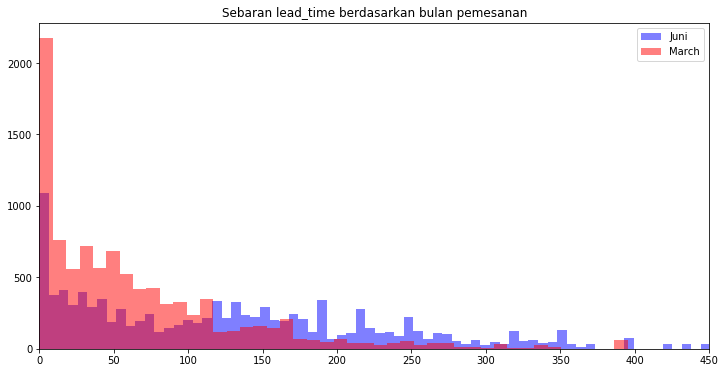

In [30]:
plt.figure(figsize=(12,6))
plt.title('Sebaran lead_time berdasarkan bulan pemesanan')
data_analisis[(data_analisis['arrival_date_month_June']==1)]['lead_time'].hist(alpha=0.5,bins=70,color='blue',grid=False)
data_analisis[(data_analisis['arrival_date_month_March']==1)]['lead_time'].hist(alpha=0.5,bins=70,color='red',grid=False)
plt.legend(loc='upper right',labels=['Juni','March'])
plt.xlim(0,450)

(0, 450)

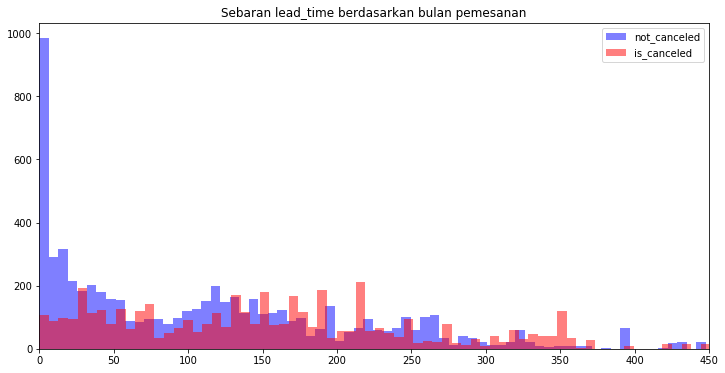

In [31]:
plt.figure(figsize=(12,6))
plt.title('Sebaran lead_time berdasarkan bulan pemesanan')
data_analisis[(data_analisis['arrival_date_month_June']==1) & (data_analisis['is_canceled']==0)]['lead_time'].hist(alpha=0.5,bins=70,color='blue',grid=False)
data_analisis[(data_analisis['arrival_date_month_June']==1) & (data_analisis['is_canceled']==1)]['lead_time'].hist(alpha=0.5,bins=70,color='red',grid=False)
plt.legend(loc='upper right',labels=['not_canceled','is_canceled'])
plt.xlim(0,450)

(0, 200)

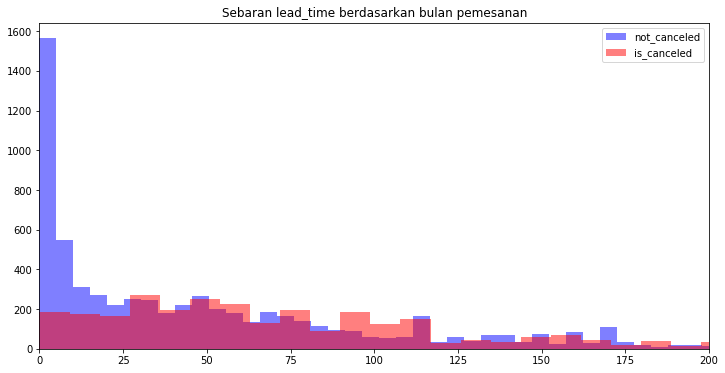

In [32]:
plt.figure(figsize=(12,6))
plt.title('Sebaran lead_time berdasarkan bulan pemesanan')
data_analisis[(data_analisis['arrival_date_month_March']==1) & (data_analisis['is_canceled']==0)]['lead_time'].hist(alpha=0.5,bins=70,color='blue',grid=False)
data_analisis[(data_analisis['arrival_date_month_March']==1) & (data_analisis['is_canceled']==1)]['lead_time'].hist(alpha=0.5,bins=70,color='red',grid=False)
plt.legend(loc='upper right',labels=['not_canceled','is_canceled'])
plt.xlim(0,200)

In [262]:
def impute_month(cols):
    month = cols[0]
    
    if (month=='January') | (month=='February') | (month=='March') | (month=='November') | (month=='December'):
        return 0
    else:
        return 1
data_analisis['busy_month']=train[['arrival_date_month']].apply(impute_month,axis=1)

In [17]:
data_analisis['busy_month'].value_counts()

1    82025
0    37365
Name: busy_month, dtype: int64

## 6. Arrival_date_week_number

In [8]:
data_analisis = pd.get_dummies(data_analisis, columns=['arrival_date_week_number'])

In [22]:
# plt.figure(figsize=(12,6))
# plt.title('Distribusi Minggu Kedatangan')
# sns.distplot(train['arrival_date_week_number'],bins=50)

In [23]:
# plt.figure(figsize=(12,6))
# plt.title('Distribusi Tamu Kedatangan berdasarkan minggu')
# sns.distplot(train[train['is_canceled']==0]['arrival_date_week_number'],bins=50)

In [24]:
# plt.figure(figsize=(12,6))
# plt.title('Distribusi Pembatalan berdasarkan Minggu Kedatangan')
# sns.distplot(train[train['is_canceled']==1]['arrival_date_week_number'],bins=50)

(0, 52)

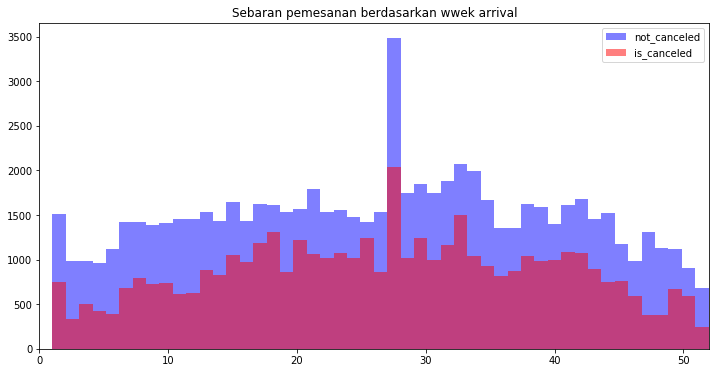

In [21]:
plt.figure(figsize=(12,6))
plt.title('Sebaran pemesanan berdasarkan wwek arrival')
data_analisis[(data_analisis['is_canceled']==0)]['arrival_date_week_number'].hist(alpha=0.5,bins=50,color='blue',grid=False)
data_analisis[(data_analisis['is_canceled']==1)]['arrival_date_week_number'].hist(alpha=0.5,bins=50,color='red',grid=False)
plt.legend(loc='upper right',labels=['not_canceled','is_canceled'])
plt.xlim(0,52)

Sudah diwakilkan oleh arrival_date_month

## 7. Arrival_date_day_of_month

In [9]:
data_analisis = pd.get_dummies(data_analisis, columns=['arrival_date_day_of_month'])

(0, 31)

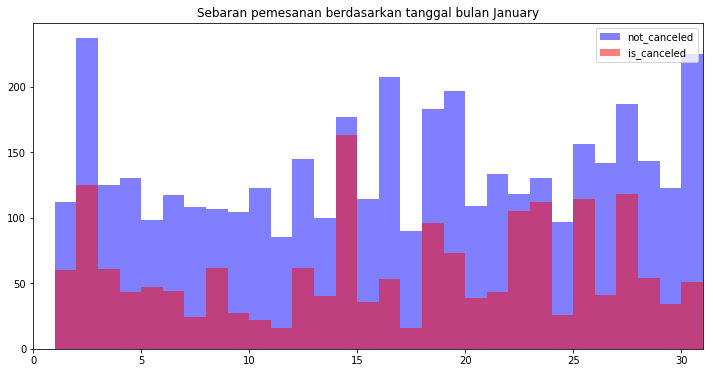

In [19]:
plt.figure(figsize=(12,6))
plt.title('Sebaran pemesanan berdasarkan tanggal bulan March')
data_analisis[(data_analisis['arrival_date_month_March']==1) & (data_analisis['is_canceled']==0)]['arrival_date_day_of_month'].hist(alpha=0.5,bins=30,color='blue',grid=False)
data_analisis[(data_analisis['arrival_date_month_March']==1) & (data_analisis['is_canceled']==1)]['arrival_date_day_of_month'].hist(alpha=0.5,bins=30,color='red',grid=False)
plt.legend(loc='upper right',labels=['not_canceled','is_canceled'])
plt.xlim(0,31)

(0, 30)

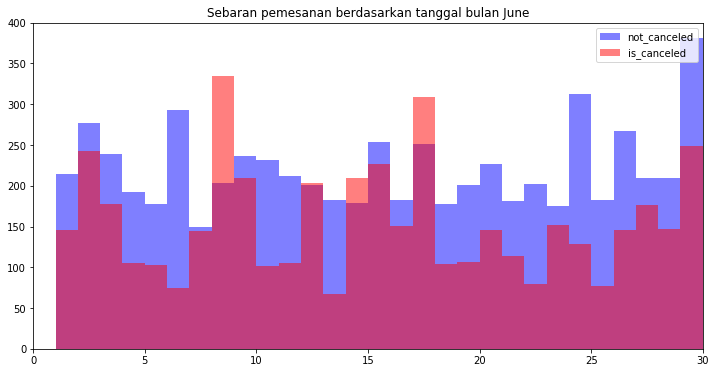

In [20]:
plt.figure(figsize=(12,6))
plt.title('Sebaran pemesanan berdasarkan tanggal bulan June')
data_analisis[(data_analisis['arrival_date_month_June']==1) & (data_analisis['is_canceled']==0)]['arrival_date_day_of_month'].hist(alpha=0.5,bins=29,color='blue',grid=False)
data_analisis[(data_analisis['arrival_date_month_June']==1) & (data_analisis['is_canceled']==1)]['arrival_date_day_of_month'].hist(alpha=0.5,bins=29,color='red',grid=False)
plt.legend(loc='upper right',labels=['not_canceled','is_canceled'])
plt.xlim(0,30)

Busy month bisa digunakan untuk memperketat guarantee yang diberikan customer dengan biaya guarantee lebih kecil dibanding non busy month. Sehingga pendapatan akan lebih maksimal dicari di busy month dan promosi lebih gencar dilakukan di non busy month

## 8. Stays_in_weekend_nights & stays_in_week_nights (lama menginap)

In [60]:
data_analisis['stays_in_weekend_nights'].value_counts().head()

0    51998
2    33308
1    30626
4     1855
3     1259
Name: stays_in_weekend_nights, dtype: int64

In [61]:
data_analisis['stays_in_week_nights'].value_counts().head()

2    33684
1    30310
3    22258
5    11077
4     9563
Name: stays_in_week_nights, dtype: int64

In [263]:
def impute_weekend_stays(cols):
    weekend = cols[0]
    week = cols[1]
    
    if (weekend > 0) & (week == 0):
        return 1
    else:
        return 0
data_analisis['weekend_stays']=data_analisis[['stays_in_weekend_nights','stays_in_week_nights']].apply(impute_weekend_stays,axis=1)

In [264]:
def impute_week_stays(cols):
    weekend = cols[0]
    week = cols[1]
    
    if (week > 0) & (weekend == 0):
        return 1
    else:
        return 0
data_analisis['week_stays']=data_analisis[['stays_in_weekend_nights','stays_in_week_nights']].apply(impute_week_stays,axis=1)

In [265]:
def impute_long_holiday(cols):
    weekend = cols[0]
    week = cols[1]
    
    if (week > 0) & (weekend > 0):
        return 1
    else:
        return 0
data_analisis['long_weekend']=data_analisis[['stays_in_weekend_nights','stays_in_week_nights']].apply(impute_long_holiday,axis=1)

In [266]:
def impute_short_time(cols):
    weekend = cols[0]
    week = cols[1]
    
    if (week == 0) & (weekend == 0):
        return 1
    else:
        return 0
data_analisis['short_time']=data_analisis[['stays_in_weekend_nights','stays_in_week_nights']].apply(impute_short_time,axis=1)

In [234]:
def impute_type_stays(cols):
    weekend = cols[0]
    week = cols[1]
    
    if (week > 0) & (weekend > 0):
        return 'Long Holiday'
    elif (week > 0) & (weekend == 0):
        return 'Week Stays'
    elif (weekend > 0) & (week == 0):
        return 'Weekend Stays'
    else:
        return 'Short Time'
data_analisis['type_stays']=data_analisis[['stays_in_weekend_nights','stays_in_week_nights']].apply(impute_type_stays,axis=1)

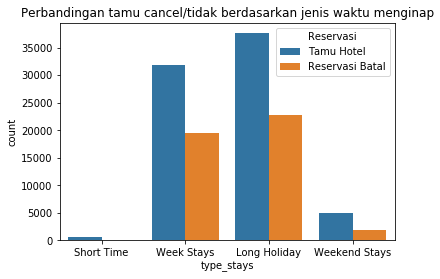

In [50]:
plt.title('Perbandingan tamu cancel/tidak berdasarkan jenis waktu menginap')
sns.countplot(x='type_stays', hue='Reservasi', data=data_analisis)

In [51]:
print('Sebanyak {:.2f}% reservasi short time dibatalkan, jauh lebih sedikit daripada weekend stays ({:.2f}%), long weekend ({:.2f}%), dan week stays ({:.2f}%)'.format(
    (data_analisis[(data_analisis['short_time']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count())*100/data_analisis[data_analisis['short_time']==1]['is_canceled'].count(),
    (data_analisis[(data_analisis['weekend_stays']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count()*100/data_analisis[data_analisis['weekend_stays']==1]['is_canceled'].count()),
    (data_analisis[(data_analisis['long_weekend']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count())*100/data_analisis[data_analisis['long_weekend']==1]['is_canceled'].count(),
    (data_analisis[(data_analisis['week_stays']==1) & (data_analisis['is_canceled']==1)]['is_canceled'].count())*100/data_analisis[data_analisis['week_stays']==1]['is_canceled'].count()))

Sebanyak 4.90% reservasi short time dibatalkan, jauh lebih sedikit daripada weekend stays (27.10%), long weekend (37.78%), dan week stays (37.96%)


In [10]:
def impute_nights(cols):
    weekend = cols[0]
    week = cols[1]
    
    return weekend + week
data_analisis['nights']=data_analisis[['stays_in_weekend_nights','stays_in_week_nights']].apply(impute_nights,axis=1)

(0, 5)

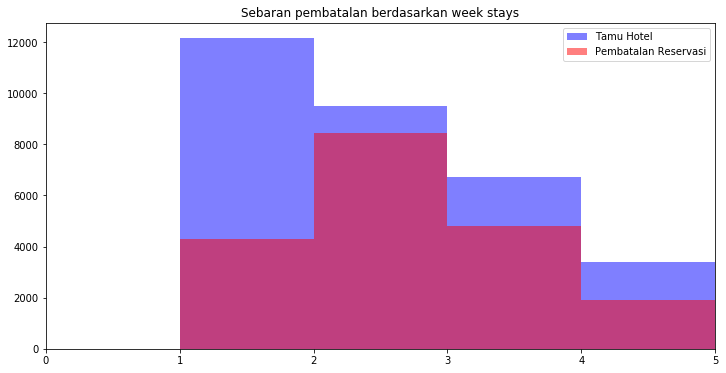

In [29]:
plt.figure(figsize=(12,6))
plt.title('Sebaran pembatalan berdasarkan week stays')
data_analisis[(data_analisis['is_canceled']==0) & (data_analisis['week_stays']==1)]['nights'].hist(alpha=0.5,bins=4,color='blue',grid=False)
data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['week_stays']==1)]['nights'].hist(alpha=0.5,bins=4,color='red',grid=False)
plt.legend(loc='upper right',labels=['Tamu Hotel','Pembatalan Reservasi'])
plt.xlim(0,5)

In [28]:
data_analisis[data_analisis['long_weekend']==1]['nights'].max()

69

In [71]:
# plt.figure(figsize=(12,6))
# plt.title('Sebaran pembatalan berdasarkan weekend stays')
# data_analisis[(data_analisis['is_canceled']==0)]['stays_in_weekend_nights'].hist(alpha=0.5,bins=18,color='blue',grid=False)
# data_analisis[(data_analisis['is_canceled']==1)]['stays_in_weekend_nights'].hist(alpha=0.5,bins=18,color='red',grid=False)
# plt.legend(loc='upper right',labels=['Tamu Hotel','Pembatalan Reservasi'])
# plt.xlim(0,5)

In [74]:
# plt.figure(figsize=(12,6))
# plt.title('Sebaran pembatalan berdasarkan night stays')
# data_analisis[(data_analisis['is_canceled']==0)]['nights'].hist(alpha=0.5,bins=68,color='blue',grid=False)
# data_analisis[(data_analisis['is_canceled']==1)]['nights'].hist(alpha=0.5,bins=68,color='red',grid=False)
# plt.legend(loc='upper right',labels=['Tamu Hotel','Pembatalan Reservasi'])
# plt.xlim(0,20)

## 9. Adults, Children, Babies

In [11]:
def impute_children(cols):
    children = cols[0]
    
    if pd.isnull(children):
        return 0
    else:
        return children
data_analisis['children'] = data_analisis[['children']].apply(impute_children,axis=1)

In [151]:
with_adults = data_analisis[(data_analisis['adults']>0) & ((data_analisis['children']==0) | data_analisis['babies']==0)]

In [152]:
without_adults = data_analisis[(data_analisis['adults']==0) & ((data_analisis['children']>0) | data_analisis['babies']>0)]

In [153]:
no_customer = data_analisis[(data_analisis['adults']==0) & (data_analisis['children']==0) & (data_analisis['babies']==0)]
complete = data_analisis[(data_analisis['adults']>0) & (data_analisis['children']>0) & (data_analisis['babies']>0)]

In [154]:
print('Sebanyak {:.2f}% reservasi oleh without adults dibatalkan, lebih tinggi daripada with adults ({:.2f}%), complete ({:.2f}%), dan no customer ({:.2f}%)'.format(
    (without_adults[(without_adults['is_canceled']==1)]['is_canceled'].count()*100/without_adults['is_canceled'].count()),
    (with_adults[(with_adults['is_canceled']==1)]['is_canceled'].count()*100/with_adults['is_canceled'].count()),
    (complete[(complete['is_canceled']==1)]['is_canceled'].count()*100/complete['is_canceled'].count()),
    (no_customer[(no_customer['is_canceled']==1)]['is_canceled'].count()*100/no_customer['is_canceled'].count())))

Sebanyak 37.67% reservasi oleh without adults dibatalkan, lebih tinggi daripada with adults (36.72%), complete (19.19%), dan no customer (13.89%)


In [267]:
def impute_customer_comb(cols):
    adults = cols[0]
    children = cols[1]
    babies = cols[2]
    
    if (adults > 0) & ((children==0) | (babies==0)):
        return 'With Adults'
    elif (adults == 0) & ((children>0) | (babies>0)):
        return 'Without Adults'
    elif (adults > 0) & (children > 0) & (babies > 0):
        return 'Complete'
#     elif (adults == 0) & (children == 0) & (babies == 0):
#         return 'No Customer'
    else:
        return 'No Customer'
data_analisis['customer_comb']=data_analisis[['adults','children','babies']].apply(impute_customer_comb,axis=1)

In [52]:
data_analisis['customer_comb'].value_counts()

With Adults       118815
Without Adults       223
No Customer          180
Complete             172
Name: customer_comb, dtype: int64

In [268]:
def impute_4adults(cols):
    adults = cols[0]
    customer_comb = cols[1]
    
    if (customer_comb == 'With Adults') & (adults > 4):
        return 'With > 4 Adults'
    elif (customer_comb == 'With Adults') & (adults == 1):
        return 'With 1 Adult'
    elif (customer_comb == 'With Adults') & (adults == 2):
        return 'With 2 Adults'
    elif (customer_comb == 'With Adults') & (adults == 3):
        return 'With 3 Adults'
    elif (customer_comb == 'With Adults') & (adults == 4):
        return 'With 4 Adults'
    else:
        return customer_comb
data_analisis['customer_comb']=data_analisis[['adults','customer_comb']].apply(impute_4adults,axis=1)

In [269]:
data_analisis = pd.get_dummies(data_analisis, columns=['customer_comb'])

In [56]:
print('Sebanyak {:.2f}% reservasi untuk > 4 Adults dibatalkan, lebih tinggi daripada with 2 Adults ({:.2f}%), without Adults ({:.2f}%), with 3 Adults ({:.2f}%), With 1 Adult ({:.2f}%), With 4 Adults ({:.2f}%), complete ({:.2f}%), dan no customer ({:.2f}%)'.format(
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['customer_comb']=='With > 4 Adults')]['is_canceled'].count()*100/data_analisis[(data_analisis['customer_comb']=='With > 4 Adults')]['is_canceled'].count()),
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['customer_comb']=='With 2 Adults')]['is_canceled'].count()*100/data_analisis[(data_analisis['customer_comb']=='With 2 Adults')]['is_canceled'].count()),
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['customer_comb']=='Without Adults')]['is_canceled'].count()*100/data_analisis[(data_analisis['customer_comb']=='Without Adults')]['is_canceled'].count()),
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['customer_comb']=='With 3 Adults')]['is_canceled'].count()*100/data_analisis[(data_analisis['customer_comb']=='With 3 Adults')]['is_canceled'].count()),
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['customer_comb']=='With 1 Adult')]['is_canceled'].count()*100/data_analisis[(data_analisis['customer_comb']=='With 1 Adult')]['is_canceled'].count()),
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['customer_comb']=='With 4 Adults')]['is_canceled'].count()*100/data_analisis[(data_analisis['customer_comb']=='With 4 Adults')]['is_canceled'].count()),
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['customer_comb']=='Complete')]['is_canceled'].count()*100/data_analisis[(data_analisis['customer_comb']=='Complete')]['is_canceled'].count()),
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['customer_comb']=='No Customer')]['is_canceled'].count()*100/data_analisis[(data_analisis['customer_comb']=='No Customer')]['is_canceled'].count())))

Sebanyak 100.00% reservasi untuk > 4 Adults dibatalkan, lebih tinggi daripada with 2 Adults (39.35%), without Adults (37.67%), with 3 Adults (34.69%), With 1 Adult (28.98%), With 4 Adults (25.81%), complete (19.19%), dan no customer (13.89%)


## 10. Meal

In [57]:
data_analisis['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [12]:
def impute_undefined(cols):
    meal = cols[0]
    
    if meal == 'Undefined':
        return 'SC'
    else:
        return meal
data_analisis['meal'] = data_analisis[['meal']].apply(impute_undefined,axis=1)

In [63]:
data_analisis['meal'].value_counts()

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

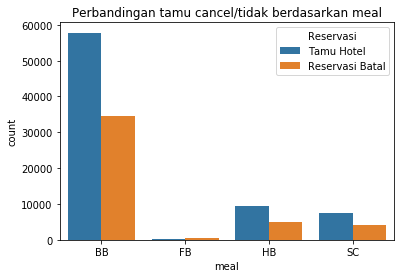

In [64]:
plt.title('Perbandingan tamu cancel/tidak berdasarkan meal')
sns.countplot(x='meal', hue='Reservasi', data=data_analisis)

In [298]:
print('Sebanyak {:.2f}% reservasi untuk > 4 Adults dibatalkan, lebih tinggi daripada with 2 Adults ({:.2f}%), without Adults ({:.2f}%), with 3 Adults ({:.2f}%)'.format(
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['meal']=='BB')]['is_canceled'].count()*100/data_analisis[(data_analisis['meal']=='BB')]['is_canceled'].count()),
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['meal']=='HB')]['is_canceled'].count()*100/data_analisis[(data_analisis['meal']=='HB')]['is_canceled'].count()),
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['meal']=='SC')]['is_canceled'].count()*100/data_analisis[(data_analisis['meal']=='SC')]['is_canceled'].count()),
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['meal']=='FB')]['is_canceled'].count()*100/data_analisis[(data_analisis['meal']=='FB')]['is_canceled'].count())))

Sebanyak 37.38% reservasi untuk > 4 Adults dibatalkan, lebih tinggi daripada with 2 Adults (34.46%), without Adults (35.98%), with 3 Adults (59.90%)


In [13]:
data_analisis = pd.get_dummies(data_analisis, columns=['meal'])

Bisa jadi 2 macam dummies (FB sama engga), bisa tetep 4 dummies

In [62]:
# def impute_fb(cols):
#     meal = cols[0]
    
#     if meal == 'FB':
#         return 'FB'
#     else:
#         return 'non-FB'
# data_analisis['meal'] = data_analisis[['meal']].apply(impute_fb,axis=1)

## 11. Country

In [14]:
data_analisis = pd.get_dummies(data_analisis, columns=['country'])

In [65]:
data_analisis['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
SMR        1
BDI        1
PYF        1
BHS        1
NPL        1
Name: country, Length: 177, dtype: int64

In [271]:
def impute_country(cols):
    country = cols[0]
    
    if country == 'PRT':
        return 1
    else:
        return 0
data_analisis['local'] = data_analisis[['country']].apply(impute_country,axis=1)

In [67]:
data_analisis['local'].value_counts()

0    70800
1    48590
Name: local, dtype: int64

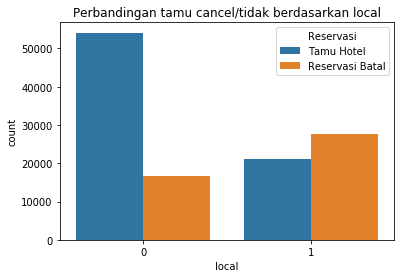

In [68]:
plt.title('Perbandingan tamu cancel/tidak berdasarkan local')
sns.countplot(x='local', hue='Reservasi', data=data_analisis)

In [69]:
print('Sebanyak {:.2f}% reservasi local dibatalkan, lebih tinggi daripada international ({:.2f}%)'.format(
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['local']==1)]['is_canceled'].count()*100/data_analisis[(data_analisis['local']==1)]['is_canceled'].count()),
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['local']==0)]['is_canceled'].count()*100/data_analisis[(data_analisis['local']==0)]['is_canceled'].count())))

Sebanyak 56.64% reservasi local dibatalkan, lebih tinggi daripada international (23.59%)


In [75]:
data_analisis[data_analisis['country'].isnull()]['is_canceled'].value_counts()

0    421
1     67
Name: is_canceled, dtype: int64

In [272]:
def impute_country(cols):
    country = cols[0]
    
    if pd.isnull(country):
        return 'GBR'
    else:
        return country
data_analisis['country'] = data_analisis[['country']].apply(impute_country,axis=1)

In [273]:
def impute_country(cols):
    country = cols[0]
    
    if country == 'PRT':
        return 1
    else:
        return 0
data_analisis['local'] = data_analisis[['country']].apply(impute_country,axis=1)

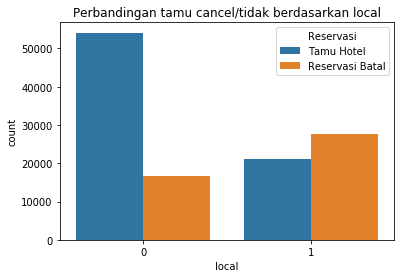

In [84]:
plt.title('Perbandingan tamu cancel/tidak berdasarkan local')
sns.countplot(x='local', hue='Reservasi', data=data_analisis)

In [69]:
print('Sebanyak {:.2f}% reservasi local dibatalkan, lebih tinggi daripada international ({:.2f}%)'.format(
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['local']==1)]['is_canceled'].count()*100/data_analisis[(data_analisis['local']==1)]['is_canceled'].count()),
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['local']==0)]['is_canceled'].count()*100/data_analisis[(data_analisis['local']==0)]['is_canceled'].count())))

Sebanyak 56.64% reservasi local dibatalkan, lebih tinggi daripada international (23.59%)


## 12. Market Segment and Distribution Channel

Market_segment lebih ke customernya tipikal suka cari dari mana atau orang mana. Kalo distribution channel yang bagian iklanin produk kita

In [15]:
data_analisis = pd.get_dummies(data_analisis, columns=['market_segment'])

In [16]:
data_analisis = pd.get_dummies(data_analisis, columns=['distribution_channel'])

In [89]:
data_analisis['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [90]:
data_analisis['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [91]:
data_analisis[data_analisis['market_segment']=='Undefined']['is_canceled'].value_counts()

1    2
Name: is_canceled, dtype: int64

In [92]:
data_analisis[data_analisis['distribution_channel']=='Undefined']['is_canceled'].value_counts()

1    4
0    1
Name: is_canceled, dtype: int64

In [95]:
print('Sebanyak {:.2f}% reservasi local dibatalkan, lebih tinggi daripada international ({:.2f}%)'.format(
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['market_segment']=='Online TA')]['is_canceled'].count()*100/data_analisis[(data_analisis['market_segment']=='Online TA')]['is_canceled'].count()),
    (data_analisis[(data_analisis['is_canceled']==1) & (data_analisis['market_segment']=='Offline TA/TO')]['is_canceled'].count()*100/data_analisis[(data_analisis['market_segment']=='Offline TA/TO')]['is_canceled'].count())))

Sebanyak 36.72% reservasi local dibatalkan, lebih tinggi daripada international (34.32%)


In [96]:
data_analisis[data_analisis['market_segment']=='Groups']['is_canceled'].value_counts(normalize=True)

1    0.61062
0    0.38938
Name: is_canceled, dtype: float64

In [97]:
data_analisis[data_analisis['market_segment']=='Direct']['is_canceled'].value_counts(normalize=True)

0    0.846581
1    0.153419
Name: is_canceled, dtype: float64

In [98]:
data_analisis[data_analisis['market_segment']=='Corporate']['is_canceled'].value_counts(normalize=True)

0    0.812653
1    0.187347
Name: is_canceled, dtype: float64

In [99]:
data_analisis[data_analisis['market_segment']=='Complementary']['is_canceled'].value_counts(normalize=True)

0    0.869448
1    0.130552
Name: is_canceled, dtype: float64

In [101]:
data_analisis[data_analisis['market_segment']=='Aviation']['is_canceled'].value_counts(normalize=True)

0    0.780591
1    0.219409
Name: is_canceled, dtype: float64

In [102]:
data_analisis[data_analisis['distribution_channel']=='TA/TO']['is_canceled'].value_counts(normalize=True)

0    0.589741
1    0.410259
Name: is_canceled, dtype: float64

In [103]:
data_analisis[data_analisis['distribution_channel']=='Direct']['is_canceled'].value_counts(normalize=True)

0    0.825401
1    0.174599
Name: is_canceled, dtype: float64

In [104]:
data_analisis[data_analisis['distribution_channel']=='Corporate']['is_canceled'].value_counts(normalize=True)

0    0.779242
1    0.220758
Name: is_canceled, dtype: float64

In [105]:
data_analisis[data_analisis['distribution_channel']=='GDS']['is_canceled'].value_counts(normalize=True)

0    0.80829
1    0.19171
Name: is_canceled, dtype: float64

In [274]:
def impute_market(cols):
    market = cols[0]
    
    if (market == 'Online TA') | (market == 'Offline TA/TO'):
        return 1
    else:
        return 0
data_analisis['market_TA_TO'] = data_analisis[['market_segment']].apply(impute_market,axis=1)

In [275]:
def impute_market2(cols):
    market = cols[0]
    
    if (market == 'Groups'):
        return 1
    else:
        return 0
data_analisis['market_Groups'] = data_analisis[['market_segment']].apply(impute_market2,axis=1)

In [276]:
def impute_market3(cols):
    market = cols[0]
    
    if (market == 'Undefined'):
        return 1
    else:
        return 0
data_analisis['market_Undefined'] = data_analisis[['market_segment']].apply(impute_market3,axis=1)

In [277]:
def impute_channel(cols):
    channel = cols[0]
    
    if (channel == 'TA/TO'):
        return 1
    else:
        return 0
data_analisis['channel_TA_TO'] = data_analisis[['distribution_channel']].apply(impute_channel,axis=1)

In [278]:
def impute_channel2(cols):
    channel = cols[0]
    
    if (channel == 'Undefined'):
        return 1
    else:
        return 0
data_analisis['channel_Undefined'] = data_analisis[['distribution_channel']].apply(impute_channel2,axis=1)

## 13. Is_repeated_Guest

In [125]:
data_analisis[data_analisis['is_repeated_guest']==1]['is_canceled'].value_counts(normalize=True)

0    0.855118
1    0.144882
Name: is_canceled, dtype: float64

In [126]:
data_analisis[data_analisis['is_repeated_guest']==0]['is_canceled'].value_counts(normalize=True)

0    0.622149
1    0.377851
Name: is_canceled, dtype: float64

## 14. previous_booking

In [130]:
data_analisis[data_analisis['previous_cancellations']==1]['is_canceled'].value_counts(normalize=True)

1    0.944307
0    0.055693
Name: is_canceled, dtype: float64

In [131]:
data_analisis[data_analisis['previous_cancellations']==0]['is_canceled'].value_counts(normalize=True)

0    0.660939
1    0.339061
Name: is_canceled, dtype: float64

In [132]:
data_analisis[data_analisis['previous_bookings_not_canceled']==0]['is_canceled'].value_counts(normalize=True)

0    0.619729
1    0.380271
Name: is_canceled, dtype: float64

In [133]:
data_analisis[data_analisis['previous_bookings_not_canceled']==1]['is_canceled'].value_counts(normalize=True)

0    0.948768
1    0.051232
Name: is_canceled, dtype: float64

## 15. room_type

In [17]:
data_analisis = pd.get_dummies(data_analisis, columns=['reserved_room_type'])

In [18]:
data_analisis = pd.get_dummies(data_analisis, columns=['assigned_room_type'])

In [174]:
data_analisis['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [138]:
data_analisis[data_analisis['reserved_room_type']=='A']['is_canceled'].value_counts(normalize=True)

0    0.608926
1    0.391074
Name: is_canceled, dtype: float64

In [139]:
data_analisis[data_analisis['reserved_room_type']=='D']['is_canceled'].value_counts(normalize=True)

0    0.682204
1    0.317796
Name: is_canceled, dtype: float64

In [140]:
data_analisis[data_analisis['reserved_room_type']=='E']['is_canceled'].value_counts(normalize=True)

0    0.707116
1    0.292884
Name: is_canceled, dtype: float64

In [141]:
data_analisis[data_analisis['reserved_room_type']=='F']['is_canceled'].value_counts(normalize=True)

0    0.696237
1    0.303763
Name: is_canceled, dtype: float64

In [142]:
data_analisis[data_analisis['reserved_room_type']=='G']['is_canceled'].value_counts(normalize=True)

0    0.635626
1    0.364374
Name: is_canceled, dtype: float64

In [143]:
data_analisis[data_analisis['reserved_room_type']=='B']['is_canceled'].value_counts(normalize=True)

0    0.670841
1    0.329159
Name: is_canceled, dtype: float64

In [145]:
data_analisis[data_analisis['reserved_room_type']=='C']['is_canceled'].value_counts(normalize=True)

0    0.669528
1    0.330472
Name: is_canceled, dtype: float64

In [146]:
data_analisis[data_analisis['reserved_room_type']=='H']['is_canceled'].value_counts(normalize=True)

0    0.592346
1    0.407654
Name: is_canceled, dtype: float64

In [147]:
data_analisis[data_analisis['reserved_room_type']=='P']['is_canceled'].value_counts(normalize=True)

1    1.0
Name: is_canceled, dtype: float64

In [149]:
data_analisis[data_analisis['reserved_room_type']=='L']['is_canceled'].value_counts(normalize=True)

0    0.666667
1    0.333333
Name: is_canceled, dtype: float64

In [279]:
def impute_reserved(cols):
    reserved = cols[0]
    
    if (reserved == 'P'):
        return 1
    else:
        return 0
data_analisis['reserved_P'] = data_analisis[['reserved_room_type']].apply(impute_reserved,axis=1)

In [175]:
data_analisis['assigned_room_type'].value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [152]:
data_analisis[data_analisis['assigned_room_type']=='A']['is_canceled'].value_counts(normalize=True)

0    0.555075
1    0.444925
Name: is_canceled, dtype: float64

In [153]:
data_analisis[data_analisis['assigned_room_type']=='D']['is_canceled'].value_counts(normalize=True)

0    0.748756
1    0.251244
Name: is_canceled, dtype: float64

In [154]:
data_analisis[data_analisis['assigned_room_type']=='E']['is_canceled'].value_counts(normalize=True)

0    0.747886
1    0.252114
Name: is_canceled, dtype: float64

In [155]:
data_analisis[data_analisis['assigned_room_type']=='F']['is_canceled'].value_counts(normalize=True)

0    0.752866
1    0.247134
Name: is_canceled, dtype: float64

In [156]:
data_analisis[data_analisis['assigned_room_type']=='G']['is_canceled'].value_counts(normalize=True)

0    0.694477
1    0.305523
Name: is_canceled, dtype: float64

In [157]:
data_analisis[data_analisis['assigned_room_type']=='C']['is_canceled'].value_counts(normalize=True)

0    0.812211
1    0.187789
Name: is_canceled, dtype: float64

In [158]:
data_analisis[data_analisis['assigned_room_type']=='B']['is_canceled'].value_counts(normalize=True)

0    0.763292
1    0.236708
Name: is_canceled, dtype: float64

In [159]:
data_analisis[data_analisis['assigned_room_type']=='H']['is_canceled'].value_counts(normalize=True)

0    0.647472
1    0.352528
Name: is_canceled, dtype: float64

In [160]:
data_analisis[data_analisis['assigned_room_type']=='I']['is_canceled'].value_counts(normalize=True)

0    0.986226
1    0.013774
Name: is_canceled, dtype: float64

In [161]:
data_analisis[data_analisis['assigned_room_type']=='K']['is_canceled'].value_counts(normalize=True)

0    0.956989
1    0.043011
Name: is_canceled, dtype: float64

In [162]:
data_analisis[data_analisis['assigned_room_type']=='P']['is_canceled'].value_counts(normalize=True)

1    1.0
Name: is_canceled, dtype: float64

In [163]:
data_analisis[data_analisis['assigned_room_type']=='L']['is_canceled'].value_counts(normalize=True)

1    1.0
Name: is_canceled, dtype: float64

In [280]:
def impute_assigned(cols):
    assigned = cols[0]
    
    if (assigned == 'P') | (assigned == 'L'):
        return 1
    else:
        return 0
data_analisis['assigned_PL'] = data_analisis[['assigned_room_type']].apply(impute_assigned,axis=1)

In [281]:
def impute_assigned2(cols):
    assigned = cols[0]
    
    if (assigned == 'I') | (assigned == 'K'):
        return 1
    else:
        return 0
data_analisis['assigned_IK'] = data_analisis[['assigned_room_type']].apply(impute_assigned2,axis=1)

In [282]:
def impute_assigned3(cols):
    assigned = cols[0]
    
    if (assigned == 'A'):
        return 1
    else:
        return 0
data_analisis['assigned_A'] = data_analisis[['assigned_room_type']].apply(impute_assigned3,axis=1)

## 16. booking_changes

In [167]:
data_analisis[data_analisis['booking_changes']==1]['is_canceled'].value_counts(normalize=True)

0    0.857728
1    0.142272
Name: is_canceled, dtype: float64

In [168]:
data_analisis[data_analisis['booking_changes']==0]['is_canceled'].value_counts(normalize=True)

0    0.591458
1    0.408542
Name: is_canceled, dtype: float64

## 16. deposit_type

In [19]:
data_analisis = pd.get_dummies(data_analisis, columns=['deposit_type'])

In [173]:
data_analisis['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [170]:
data_analisis[data_analisis['deposit_type']=='No Deposit']['is_canceled'].value_counts(normalize=True)

0    0.71623
1    0.28377
Name: is_canceled, dtype: float64

In [171]:
data_analisis[data_analisis['deposit_type']=='Non Refund']['is_canceled'].value_counts(normalize=True)

1    0.993624
0    0.006376
Name: is_canceled, dtype: float64

In [172]:
data_analisis[data_analisis['deposit_type']=='Refundable']['is_canceled'].value_counts(normalize=True)

0    0.777778
1    0.222222
Name: is_canceled, dtype: float64

In [283]:
def impute_deposit(cols):
    deposit = cols[0]
    
    if (deposit == 'Non Refund'):
        return 1
    else:
        return 0
data_analisis['deposit_nonrefund'] = data_analisis[['deposit_type']].apply(impute_deposit,axis=1)

## 17. agent & company

In [22]:
data_analisis[data_analisis['agent'].isnull()]['is_canceled'].value_counts(normalize=True)

0    0.753366
1    0.246634
Name: is_canceled, dtype: float64

In [31]:
data_analisis[data_analisis['company'].isnull()]['is_canceled'].count()/119390

0.943068933746545

In [27]:
def impute_agent(cols):
    agent = cols[0]
    
    if pd.isnull(agent):
        return 9.0
    else:
        return agent
data_analisis['agent'] = data_analisis[['agent']].apply(impute_agent,axis=1)

In [20]:
data_analisis = pd.get_dummies(data_analisis, columns=['agent'])

In [179]:
data_analisis['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [180]:
data_analisis[data_analisis['agent']==9.0]['is_canceled'].value_counts(normalize=True)

0    0.584994
1    0.415006
Name: is_canceled, dtype: float64

In [182]:
data_analisis[data_analisis['agent']==240.0]['is_canceled'].value_counts(normalize=True)

0    0.606091
1    0.393909
Name: is_canceled, dtype: float64

In [184]:
data_analisis[(data_analisis['agent']!=9.0) & (data_analisis['agent']!=240.0)]['is_canceled'].value_counts(normalize=True)

0    0.653421
1    0.346579
Name: is_canceled, dtype: float64

In [190]:
data_analisis[(data_analisis['agent']==9.0) | (data_analisis['agent']==240.0)]['is_canceled'].value_counts(normalize=True)

0    0.591396
1    0.408604
Name: is_canceled, dtype: float64

In [284]:
def impute_agent(cols):
    agent = cols[0]
    
    if (agent == 9.0) | (agent == 240.0):
        return 1
    else:
        return 0
data_analisis['agent_9_240'] = data_analisis[['agent']].apply(impute_agent,axis=1)

In [178]:
data_analisis['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
229.0      1
213.0      1
416.0      1
320.0      1
461.0      1
Name: company, Length: 352, dtype: int64

In [186]:
data_analisis[data_analisis['company']==40.0]['is_canceled'].value_counts(normalize=True)

0    0.916936
1    0.083064
Name: is_canceled, dtype: float64

In [187]:
data_analisis[data_analisis['company']==223.0]['is_canceled'].value_counts(normalize=True)

0    0.848214
1    0.151786
Name: is_canceled, dtype: float64

In [188]:
data_analisis[(data_analisis['agent']!=40.0) & (data_analisis['agent']!=223.0)]['is_canceled'].value_counts(normalize=True)

0    0.626985
1    0.373015
Name: is_canceled, dtype: float64

In [189]:
data_analisis[(data_analisis['agent']==40.0) | (data_analisis['agent']==223.0)]['is_canceled'].value_counts(normalize=True)

0    0.92053
1    0.07947
Name: is_canceled, dtype: float64

In [285]:
def impute_company(cols):
    company = cols[0]
    
    if (company == 40.0) | (company == 223.0):
        return 1
    else:
        return 0
data_analisis['company_40_223'] = data_analisis[['company']].apply(impute_company,axis=1)

In [286]:
data_analisis[data_analisis['agent_9_240']==1]['is_canceled'].value_counts(normalize=True)

0    0.591396
1    0.408604
Name: is_canceled, dtype: float64

In [198]:
data_analisis[data_analisis['company_40_223']==1]['is_canceled'].value_counts(normalize=True)

0    0.885447
1    0.114553
Name: is_canceled, dtype: float64

## 18. days_in_waiting_list

(0, 100)

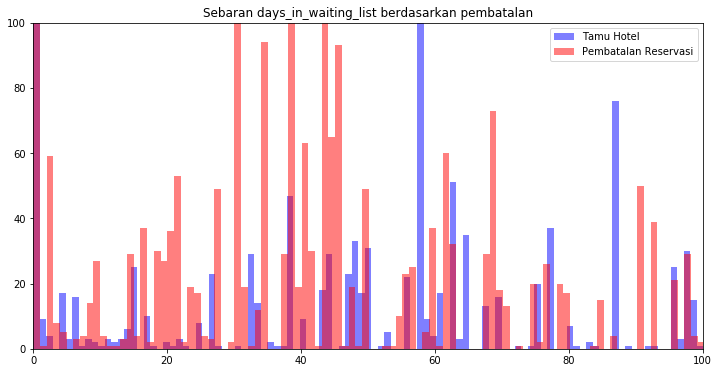

In [210]:
plt.figure(figsize=(12,6))
plt.title('Sebaran days_in_waiting_list berdasarkan pembatalan')
data_analisis[(data_analisis['is_canceled']==0)]['days_in_waiting_list'].hist(alpha=0.5,bins=390,color='blue',grid=False)
data_analisis[(data_analisis['is_canceled']==1)]['days_in_waiting_list'].hist(alpha=0.5,bins=390,color='red',grid=False)
plt.legend(loc='upper right',labels=['Tamu Hotel','Pembatalan Reservasi'])
plt.xlim(0,100)
plt.ylim(0,100)

In [207]:
data_analisis['days_in_waiting_list'].value_counts()

0      115692
39        227
58        164
44        141
31        127
        ...  
175         1
117         1
89          1
92          1
183         1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [287]:
def impute_waiting(cols):
    waiting = cols[0]
    
    if (waiting == 0):
        return 1
    else:
        return 0
data_analisis['no_waiting'] = data_analisis[['days_in_waiting_list']].apply(impute_waiting,axis=1)

## 19. customer_types

In [21]:
data_analisis = pd.get_dummies(data_analisis, columns=['customer_type'])

In [213]:
data_analisis['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [214]:
data_analisis[data_analisis['customer_type']=='Transient']['is_canceled'].value_counts(normalize=True)

0    0.592537
1    0.407463
Name: is_canceled, dtype: float64

In [215]:
data_analisis[data_analisis['customer_type']=='Transient-Party']['is_canceled'].value_counts(normalize=True)

0    0.745701
1    0.254299
Name: is_canceled, dtype: float64

In [216]:
data_analisis[data_analisis['customer_type']=='Contract']['is_canceled'].value_counts(normalize=True)

0    0.690383
1    0.309617
Name: is_canceled, dtype: float64

In [217]:
data_analisis[data_analisis['customer_type']=='Group']['is_canceled'].value_counts(normalize=True)

0    0.897747
1    0.102253
Name: is_canceled, dtype: float64

In [288]:
def impute_type(cols):
    types = cols[0]
    
    if (types == 'Group'):
        return 1
    else:
        return 0
data_analisis['types_Group'] = data_analisis[['customer_type']].apply(impute_type,axis=1)

In [289]:
def impute_type2(cols):
    types = cols[0]
    
    if (types == 'Transient'):
        return 1
    else:
        return 0
data_analisis['types_Transient'] = data_analisis[['customer_type']].apply(impute_type2,axis=1)

## 20. adr

In [220]:
data_analisis['adr'].value_counts()

62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
202.74       1
87.64        1
69.83        1
160.83       1
35.64        1
Name: adr, Length: 8879, dtype: int64

(-30, 300)

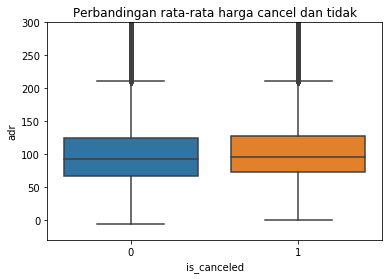

In [226]:
plt.title("Perbandingan rata-rata harga cancel dan tidak")
sns.boxplot(x='is_canceled',y='adr',data=data_analisis)
plt.ylim(-30,300)

## 21. required_car_parking_spaces

In [240]:
data_analisis[data_analisis['is_canceled']==1]['required_car_parking_spaces'].value_counts()

0    44224
Name: required_car_parking_spaces, dtype: int64

In [241]:
data_analisis[data_analisis['required_car_parking_spaces']>0]['is_canceled'].value_counts()

0    7416
Name: is_canceled, dtype: int64

In [290]:
def impute_parking(cols):
    parking = cols[0]
    
    if (parking > 0):
        return 1
    else:
        return 0
data_analisis['parking'] = data_analisis[['required_car_parking_spaces']].apply(impute_parking,axis=1)

## 22. total_of_special_requests

In [243]:
data_analisis[data_analisis['is_canceled']==1]['total_of_special_requests'].value_counts()

0    33556
1     7318
2     2866
3      446
4       36
5        2
Name: total_of_special_requests, dtype: int64

In [244]:
data_analisis['total_of_special_requests'].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [245]:
data_analisis[data_analisis['total_of_special_requests']==0]['is_canceled'].value_counts(normalize=True)

0    0.522796
1    0.477204
Name: is_canceled, dtype: float64

In [246]:
data_analisis[data_analisis['total_of_special_requests']>0]['is_canceled'].value_counts(normalize=True)

0    0.782605
1    0.217395
Name: is_canceled, dtype: float64

In [291]:
def impute_requests(cols):
    requests = cols[0]
    
    if (requests > 0):
        return 1
    else:
        return 0
data_analisis['requests'] = data_analisis[['total_of_special_requests']].apply(impute_requests,axis=1)

## 23. reservation_status

In [248]:
data_analisis['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [250]:
data_analisis[data_analisis['reservation_status']=='Check-Out']['is_canceled'].value_counts(normalize=True)

0    1.0
Name: is_canceled, dtype: float64

In [251]:
data_analisis[data_analisis['reservation_status']=='Canceled']['is_canceled'].value_counts(normalize=True)

1    1.0
Name: is_canceled, dtype: float64

## Data Manipulation

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Selection using Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_analisis.drop(labels=['is_canceled', 'stays_in_weekend_nights', 'stays_in_week_nights', 'company', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'Reservasi'],axis=1), data_analisis['is_canceled'], test_size=0.3, random_state=101)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
X = data_analisis.drop(labels=['is_canceled', 'stays_in_weekend_nights', 'stays_in_week_nights', 'company', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'Reservasi'],axis=1)
y = data_analisis['is_canceled']

## 1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,logreg_pred))
print('\n')
print(classification_report(y_test,logreg_pred))

C:\Users\Rizki Prastyo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[20427  2165]
 [ 4819  8406]]


              precision    recall  f1-score   support

           0       0.81      0.90      0.85     22592
           1       0.80      0.64      0.71     13225

    accuracy                           0.81     35817
   macro avg       0.80      0.77      0.78     35817
weighted avg       0.80      0.81      0.80     35817



In [28]:
print(cross_val_score(logreg, X, y, cv=5))

C:\Users\Rizki Prastyo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rizki Prastyo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rizki Prastyo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rizki Prastyo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rizki Prastyo\AppData\Local\Continuum\a

[0.70224884 0.54828713 0.69000754 0.51964151 0.59685053]


## 2. Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train,y_train)
naive_pred = naive.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,naive_pred))
print('\n')
print(classification_report(y_test,naive_pred))

[[ 4701 17891]
 [  678 12547]]


              precision    recall  f1-score   support

           0       0.87      0.21      0.34     22592
           1       0.41      0.95      0.57     13225

    accuracy                           0.48     35817
   macro avg       0.64      0.58      0.46     35817
weighted avg       0.70      0.48      0.42     35817



In [30]:
print(cross_val_score(naive, X, y, cv=5))

[0.52108547 0.44827875 0.44304381 0.44471899 0.43694769]


## 3. Bagging Classifier

In [31]:
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier(random_state=0)
BC.fit(X_train,y_train)
BC_pred = BC.predict(X_test)
print(confusion_matrix(y_test,BC_pred))
print('\n')
print(classification_report(y_test,BC_pred))

[[20686  1906]
 [ 3074 10151]]


              precision    recall  f1-score   support

           0       0.87      0.92      0.89     22592
           1       0.84      0.77      0.80     13225

    accuracy                           0.86     35817
   macro avg       0.86      0.84      0.85     35817
weighted avg       0.86      0.86      0.86     35817



In [32]:
print(cross_val_score(BC, X, y, cv=5))

[0.62322543 0.53840355 0.47792947 0.46670575 0.5384261 ]


## 4. Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
from sklearn.model_selection import train_test_split
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('Confussion Matrix')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print('Classification Matrix')
print(classification_report(y_test,rfc_pred))

Confussion Matrix
[[20469  2123]
 [ 2931 10294]]


Classification Matrix
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     22592
           1       0.83      0.78      0.80     13225

    accuracy                           0.86     35817
   macro avg       0.85      0.84      0.85     35817
weighted avg       0.86      0.86      0.86     35817



In [52]:
print(cross_val_score(rfc, X, y, cv=5))

[0.68252439 0.7478432  0.75596784 0.73996985 0.73329983]


## 5. Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
print(confusion_matrix(y_test,dtc_pred))
print('\n')
print(classification_report(y_test,dtc_pred))

[[19852  2740]
 [ 2839 10386]]


              precision    recall  f1-score   support

           0       0.87      0.88      0.88     22592
           1       0.79      0.79      0.79     13225

    accuracy                           0.84     35817
   macro avg       0.83      0.83      0.83     35817
weighted avg       0.84      0.84      0.84     35817



In [54]:
print(cross_val_score(dtc, X, y, cv=5))

[0.67917417 0.71400452 0.71337633 0.71128235 0.72182435]


## 6. Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)
print(confusion_matrix(y_test,gbc_pred))
print('\n')
print(classification_report(y_test,gbc_pred))

[[20560  2032]
 [ 3573  9652]]


              precision    recall  f1-score   support

           0       0.85      0.91      0.88     22592
           1       0.83      0.73      0.77     13225

    accuracy                           0.84     35817
   macro avg       0.84      0.82      0.83     35817
weighted avg       0.84      0.84      0.84     35817



In [56]:
print(cross_val_score(gbc, X, y, cv=5))

[0.70832112 0.7841109  0.80948991 0.82825195 0.83699795]


## 7. Ada Boost Classifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=0)
abc.fit(X_train,y_train)
abc_pred = abc.predict(X_test)
print(confusion_matrix(y_test,abc_pred))
print('\n')
print(classification_report(y_test,abc_pred))

[[20653  1939]
 [ 4455  8770]]


              precision    recall  f1-score   support

           0       0.82      0.91      0.87     22592
           1       0.82      0.66      0.73     13225

    accuracy                           0.82     35817
   macro avg       0.82      0.79      0.80     35817
weighted avg       0.82      0.82      0.82     35817



In [58]:
print(cross_val_score(abc, X, y, cv=5))

[0.7259098  0.79713544 0.79784739 0.79822431 0.82359593]
